In [43]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd

In [47]:
#Get values of x and y
x,y = load_wine(return_X_y=True)

#Get the column names
n = load_wine()
col_n = n['feature_names']

In [50]:
df = pd.DataFrame(x,columns=col_n)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [70]:
#Using df here so the column names can be shown when using xgboost plot_importance
x_train, x_test, y_train ,y_test = train_test_split(df,y,test_size=0.2)

In [71]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc.score(x_test,y_test)

0.9722222222222222

In [72]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(base_estimator=rfc,learning_rate=0.2)   #Use the RandomForest to build the ensemble. Default is DecisionTreeClassifier
abc.fit(x_train,y_train)
abc.score(x_test,y_test)

0.9722222222222222

In [79]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)
xgb_clf.score(x_test,y_test)

0.9722222222222222

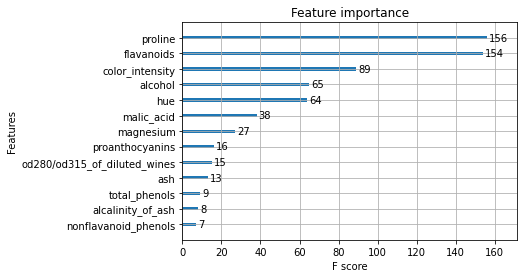

In [74]:
xgb.plot_importance(xgb_clf)